## Project 4: Orbital Mechanics



### Abstract & Description:

In this project, the goal is to introduce and familiarize students with the use of Higher-order Methods for solving differential equations. They are methods of numerically integrating ordinary differential equations.
Two techniques will be considered in this project: Runge Kutta(non-symplectic) and Verlet(symplectic).
We will compute the orbit of an asteroid under the influence of the Sun and Jupiter and use the RK4 and Verlet algorithm and investigate the long term conservation of energy for both algorithms. 


### Algorithm and discussion:

##### What is a symplectic method?

Some kinds of systems have properties that make even high order RK methods unsatisfactory. These are systems where Energy (and other quantities) are conserved. These are called "Hamiltonian" systems due to the extensive history of applying the Hamiltonian (Energy oriented) formalism to their solution. The RK algorithms focus on reducing truncation error, but do not respect any inherently conserved quantities. Symplectic methods are designed to exactly conserve these quantities at the possible expense of some truncation error. The simplest of these is the Symplectic Euler method (sometimes knows as the Cromer method). A second-order version is the Verlet method or the "Leapfrog" method.
In a nutshell, for systems that conserve energy, non-symplectic methods fail after a certain amount of iteration, but the symplectics do not. Examples are given below.

### Implementation/ Code:

The code below can do both symplectic and non-symplectic methods.
* First, we will show how the Rk4 fails after certain amount of iteration.


Populating the interactive namespace from numpy and matplotlib


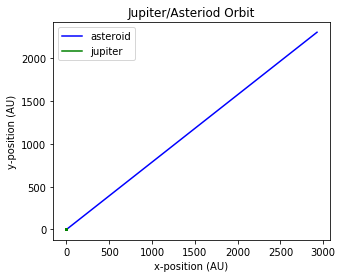

In [158]:
%pylab inline
#
# This is a derivs function for the RK4 method
# You need to modify it to work with the Symplectic Integrator
G = (2*pi)**2   # measure time in years, distance in AU
Ms = 1.0        # mass in solar masses
Mj = Ms/1047    # jupiter's mass is much less than the Sun's
Ma = Mj/1e7     # typical asteroid mass.. *really* small.
GMs = G*Ms      # save multiplying later ...
GMj = G*Mj
GMa = G*Ma
def VerletStep(s, t, derivs, dt):
    dth = dt/2.0  # half of h
    s = s + derivs(s, t, 0)*dth       # changes only positon
    s = s + derivs(s, t+dth, 1)*dt    # changes only velocity from s1
    return s + derivs(s, t+dt, 0)*dth # change only position
def RK4Step(s, t, derivs, dt):
    """
    Take a single RK4 step.
    """
    dth=dt/2.0
    f1 = derivs(s, t)
    f2 = derivs(s+f1*dth, t+dth)
    f3 = derivs(s+f2*dth, t+dth)
    f4 = derivs(s+f3*dt, t+dt)
    return s + (f1+2*f2+2*f3+f4)*dt/6.0
def derivs_grav(s, t, step=None):
    """
    Compute motion of asteriod and Jupiter about the Sun
    """
    rsa=s[:2]  # position of asteroid relative to sun
    rsj=s[2:4] # for symplectic integrators it's handy to have all r's together
    va=s[4:6]  # followed by all v's in the state array.
    vj=s[6:8]  
    rja=rsa-rsj

    rsjm3 = (rsj*rsj).sum()**(1.5)  # compute |r_{sj}|**3 for vector force calculation
    rsam3 = (rsa*rsa).sum()**(1.5)  # similar for r_{sa}
    rjam3 = (rja*rja).sum()**(1.5)  # similar for r_{ja}

    aj = -(GMs*rsj/rsjm3 - GMa*rja/rjam3)
    aa = -(GMs*rsa/rsam3 + GMj*rja/rjam3)
     # the first half of s is 'q', second half 'p'
    zero =[0]
    if step==0:
        return array([va[0],va[1],vj[0],vj[1],zero[0],zero[0],zero[0],zero[0]])  # for q-steps, just update the position
                                    # no need to compute 'a'
    else:
        # only extract x and compute a if we need it.
        if step is None: # it must be an RK4 step
             return array([va[0],va[1],vj[0],vj[1],aa[0],aa[1],aj[0],aj[1]])
        else: # velocity step
             return array([zero[0],zero[0],zero[0],zero[0],aa[0],aa[1],aj[0],aj[1]])
            # for p-steps, just updated the velocity
Rj = 5.2
Ra=3.0     # AU
Do_symplectic = False
s=array([Ra,0,Rj,0,0,sqrt(GMs/Ra),0,sqrt(GMs/Rj)])  # assume circular orbits
limit = 700
xalist=[]  # empty lists
yalist=[]
tlist=[]
xjlist=[]
yjlist=[]
enA =[]
enJ =[]
t=0.0
dt=0.3
while t<limit:
    if Do_symplectic:
        s = VerletStep(s, t, derivs_grav, dt)
    else:    
        s = RK4Step(s, t, derivs_grav, dt)
    t+=dt
    tlist.append(t)
    xalist.append(s[0])
    yalist.append(s[1])
    xjlist.append(s[2])
    yjlist.append(s[3])
    enA.append(s[5]**2)
    enJ.append(s[7]**2)
title("Jupiter/Asteriod Orbit")
xlabel("x-position (AU)")
ylabel("y-position (AU)")
axes().set_aspect('equal')
plot(xalist, yalist,'b-',label="asteroid")
plot(xjlist, yjlist,'g-',label="jupiter")
legend()


The graph obtained does not look like an orbital path. Our code is not the problem, but the technique RK4 is. It actually started the right way and after a certain amount of time, it stopped functioning well. It clearly fails to accomplish its mission when it is asked to predict the future of a system which conserves energy.
Let's plot the graph of energy vs time and see when it actually fails:
 * Important detail: $K = MV^2/2$, and M/2 is just a constant for both the asteroid and Jupyter. When you try to plot with an important factor as the mass of Jupyter, reading the graph will be hard because of the difference in scale(M_jupiter vs M_asteroid). 10e7 is a very important difference. in order to make it more readable, let's just see how the speed (V^2) actually changes. After all, the energy(K) merely depends on speed(More details in Results): 

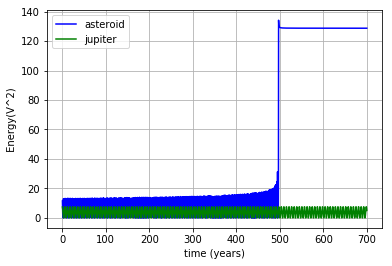

In [159]:
plot(tlist, enA,'b-',label="asteroid")
plot(tlist, enJ,'g-',label="jupiter")
xlabel("time (years)")
ylabel(" Energy(V^2) ")
legend()
grid()

It looks like the energy of Jupiter is always conserved or the change in its energy is barely remarkable. However, the asteroid's energy started decreasing since the beginning and when it reaches 300 years, the change in energy is even more remarkable.  
Let's change the Do_symplectic variable to *True* and run again the code and see what it gives us.

Populating the interactive namespace from numpy and matplotlib


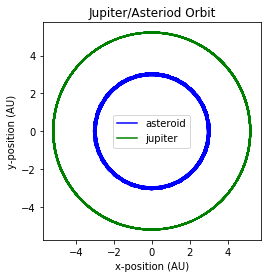

In [160]:
%pylab inline
#
# This is a derivs function for the RK4 method
# You need to modify it to work with the Symplectic Integrator
G = (2*pi)**2   # measure time in years, distance in AU
Ms = 1.0        # mass in solar masses
Mj = Ms/1047    # jupiter's mass is much less than the Sun's
Ma = Mj/1e7     # typical asteroid mass.. *really* small.
GMs = G*Ms      # save multiplying later ...
GMj = G*Mj
GMa = G*Ma
def VerletStep(s, t, derivs, dt):
    dth = dt/2.0  # half of h
    s = s + derivs(s, t, 0)*dth       # changes only positon
    s = s + derivs(s, t+dth, 1)*dt    # changes only velocity from s1
    return s + derivs(s, t+dt, 0)*dth # change only position
def RK4Step(s, t, derivs, dt):
    """
    Take a single RK4 step.
    """
    dth=dt/2.0
    f1 = derivs(s, t)
    f2 = derivs(s+f1*dth, t+dth)
    f3 = derivs(s+f2*dth, t+dth)
    f4 = derivs(s+f3*dt, t+dt)
    return s + (f1+2*f2+2*f3+f4)*dt/6.0
def derivs_grav(s, t, step=None):
    """
    Compute motion of asteriod and Jupiter about the Sun
    """
    rsa=s[:2]  # position of asteroid relative to sun
    rsj=s[2:4] # for symplectic integrators it's handy to have all r's together
    va=s[4:6]  # followed by all v's in the state array.
    vj=s[6:8]  
    rja=rsa-rsj

    rsjm3 = (rsj*rsj).sum()**(1.5)  # compute |r_{sj}|**3 for vector force calculation
    rsam3 = (rsa*rsa).sum()**(1.5)  # similar for r_{sa}
    rjam3 = (rja*rja).sum()**(1.5)  # similar for r_{ja}

    aj = -(GMs*rsj/rsjm3 - GMa*rja/rjam3)
    aa = -(GMs*rsa/rsam3 + GMj*rja/rjam3)
     # the first half of s is 'q', second half 'p'
    zero =[0]
    if step==0:
        return array([va[0],va[1],vj[0],vj[1],zero[0],zero[0],zero[0],zero[0]])  # for q-steps, just update the position
                                    # no need to compute 'a'
    else:
        # only extract x and compute a if we need it.
        if step is None: # it must be an RK4 step
             return array([va[0],va[1],vj[0],vj[1],aa[0],aa[1],aj[0],aj[1]])
        else: # velocity step
             return array([zero[0],zero[0],zero[0],zero[0],aa[0],aa[1],aj[0],aj[1]])
            # for p-steps, just updated the velocity
Rj = 5.2
Ra=3.0     # AU
Do_symplectic = True
s=array([Ra,0,Rj,0,0,sqrt(GMs/Ra),0,sqrt(GMs/Rj)])  # assume circular orbits
limit = 700
xalist=[]  # empty lists
yalist=[]
tlist=[]
xjlist=[]
yjlist=[]
enA =[]
enJ =[]
t=0.0
dt=0.3
while t<limit:
    if Do_symplectic:
        s = VerletStep(s, t, derivs_grav, dt)
    else:    
        s = RK4Step(s, t, derivs_grav, dt)
    t+=dt
    tlist.append(t)
    xalist.append(s[0])
    yalist.append(s[1])
    xjlist.append(s[2])
    yjlist.append(s[3])
    enA.append(s[5]**2)  # Computes energy
    enJ.append(s[7]**2)
title("Jupiter/Asteriod Orbit")
xlabel("x-position (AU)")
ylabel("y-position (AU)")
axes().set_aspect('equal')
plot(xalist, yalist,'b-',label="asteroid")
plot(xjlist, yjlist,'g-',label="jupiter")
legend()


As we can see, when we execute the Verlet function, we obtain a stable system that appears to conserve its energy. Let's see how the energy actually changes in time now:

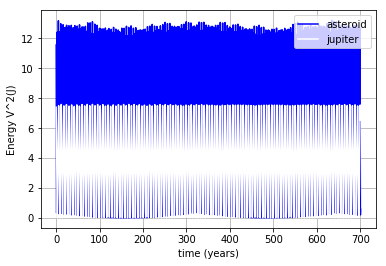

In [161]:
plot(tlist, enA,'b-',label="asteroid")
plot(tlist, enJ,'w-',label="jupiter")
xlabel("time (years)")
ylabel("Energy V^2(J)")
legend()
grid()

Just as expected, the symplectic method really conserves energy and does not fail even after a long time. The energy does not exceed certain boundaries.  


#### Results: 
The most important detail in such an investigation is to see how the energy changes.
Just as explained earlier, we did not consider the mass/2 factor because they are constant. In such a case, a constant factor plays the role of a scaler, which means it either makes a function look bigger or smaller. It does not really change anything in the behavior of the function. Hence, no need to consider M/2.
Therefore, the energy shown on the right side of the Energy vs time(years) is actually: 

UNITS:
$E = (\frac{M}{2}xV^2)$ V in AU/years and M in solar mass

=> $E = (\frac{2\exp(30) M}{2})x(4743.72V^2)$ V in M/s and M in Kgs



* In the first example, using RK4, though the energy of Jupyter remained the same, the energy of the asteroid went from 10 units of energy to 20 units of energy in the timespan of 500 years and in an instant jumps to 130 units of energy, which is 6.5 times bigger. This clearly shows and validate the ineptitude of non-symplectic techniques to handle such systems that require energy conservation. 


* In the example using Verlet steps, the energy of both astral bodies look very stable. Both graphs are periodic, though it is hard to tell. Jupiter's energy never goes above 12.5 units of energy and the asteroid's never goes below 7.5 units of energy and never above 12.5 units of energy.

### Conclusion:

Altogether, higher order non-symplectic methods work just fine, but it depends on the type of system they are supposed to predict the future of. It only fails when the system requests this special feature of conserving energy. That's where symplectic methods become handy. In our experiment, after a time span of 500 years RK4 gives, an energy of 130 units of energy, while Verlet steps give energy below 13 units of energy.